In [1]:
from feature_engineering import perform_feature_engineering
from cleaning_preprocessing import preprocess_data ,clean_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv('churn.csv')
data= df.copy()
preprocessed_data= preprocess_data(data)
engineered_data= perform_feature_engineering(preprocessed_data)
engineered_data['gender_mapped'] = engineered_data['gender'].map({0: 'Female', 1: 'Male'})
engineered_data['gender'] = engineered_data['gender'].map({0: 'Female', 1: 'Male'})
engineered_data['Churn_Label'] = engineered_data['churn_risk_score'].apply(lambda x: 'Churned' if x == 1 else 'Not Churned')

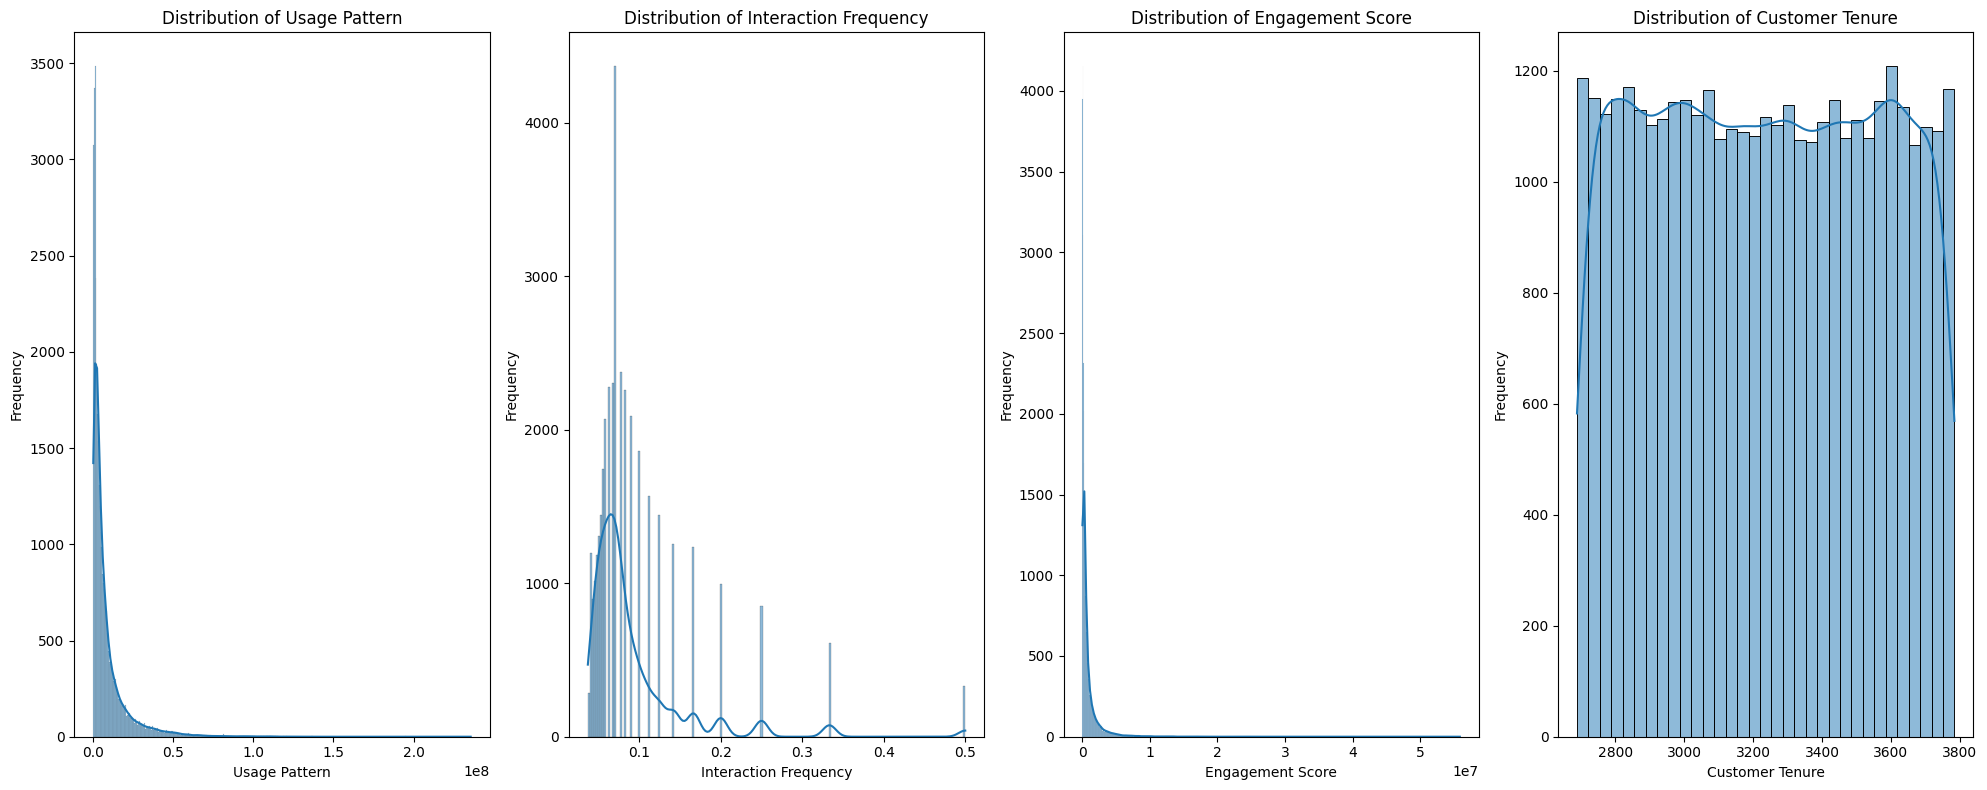

In [3]:
# Feature Distributions (Histogram)
fig, axs = plt.subplots(1, 4, figsize=(20, 8))

# Usage Pattern Distribution
if 'usage_pattern' in engineered_data.columns:
    sns.histplot(engineered_data['usage_pattern'], kde=True, ax=axs[0])
    axs[0].set_title('Distribution of Usage Pattern')
    axs[0].set_xlabel('Usage Pattern')
    axs[0].set_ylabel('Frequency')
else:
    axs[0].set_visible(False)

# Interaction Frequency Distribution
sns.histplot(engineered_data['interaction_frequency'], kde=True, ax=axs[1])
axs[1].set_title('Distribution of Interaction Frequency')
axs[1].set_xlabel('Interaction Frequency')
axs[1].set_ylabel('Frequency')

# Engagement Score Distribution
sns.histplot(engineered_data['engagement_score'], kde=True, ax=axs[2])
axs[2].set_title('Distribution of Engagement Score')
axs[2].set_xlabel('Engagement Score')
axs[2].set_ylabel('Frequency')

# Customer Tenure Distribution
if 'customer_tenure' in engineered_data.columns:
    sns.histplot(engineered_data['customer_tenure'], kde=True, ax=axs[3])
    axs[3].set_title('Distribution of Customer Tenure')
    axs[3].set_xlabel('Customer Tenure')
    axs[3].set_ylabel('Frequency')
else:
    axs[3].set_visible(False)

plt.tight_layout()
plt.show()


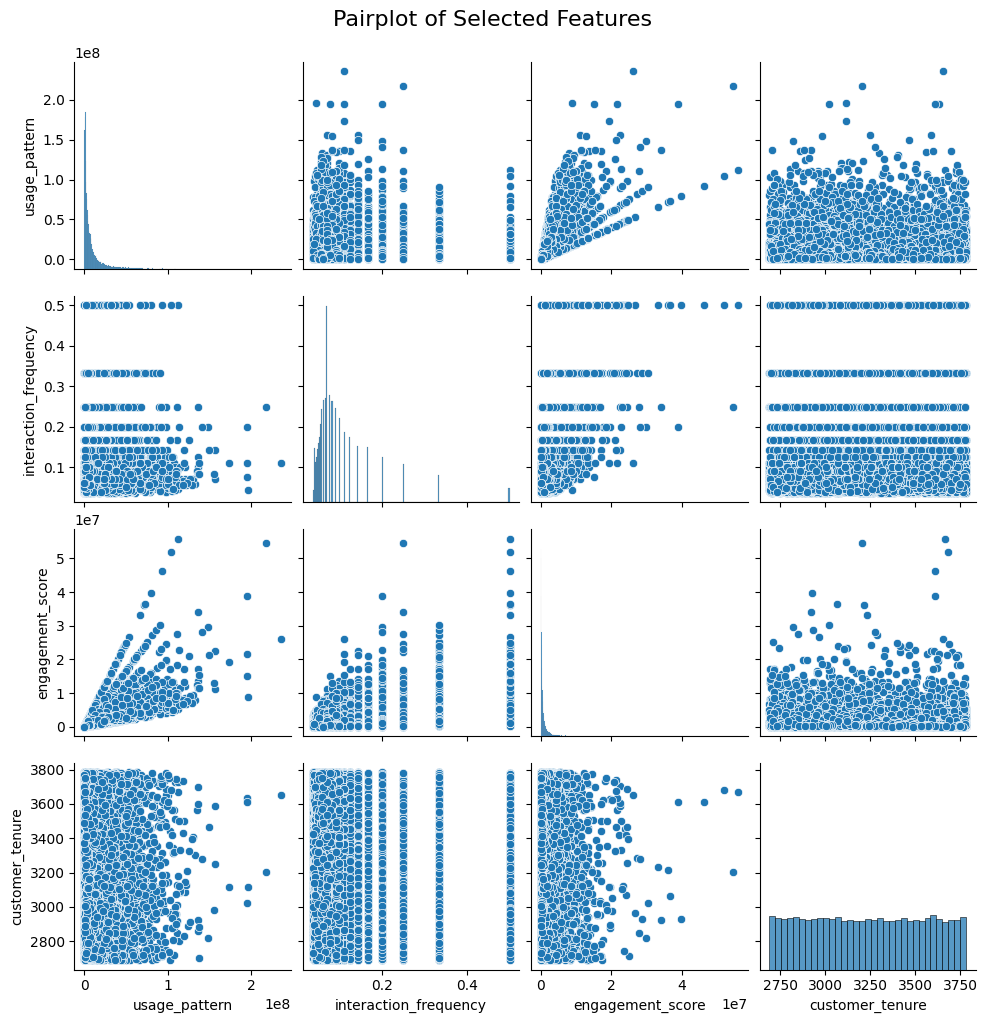

In [4]:
# pairplot
subset_cols = ['usage_pattern', 'interaction_frequency', 'engagement_score', 'customer_tenure']
subset_cols = [col for col in subset_cols if col in engineered_data.columns]

sns.pairplot(engineered_data[subset_cols])
plt.suptitle("Pairplot of Selected Features", fontsize=16, y=1.02)
plt.show()


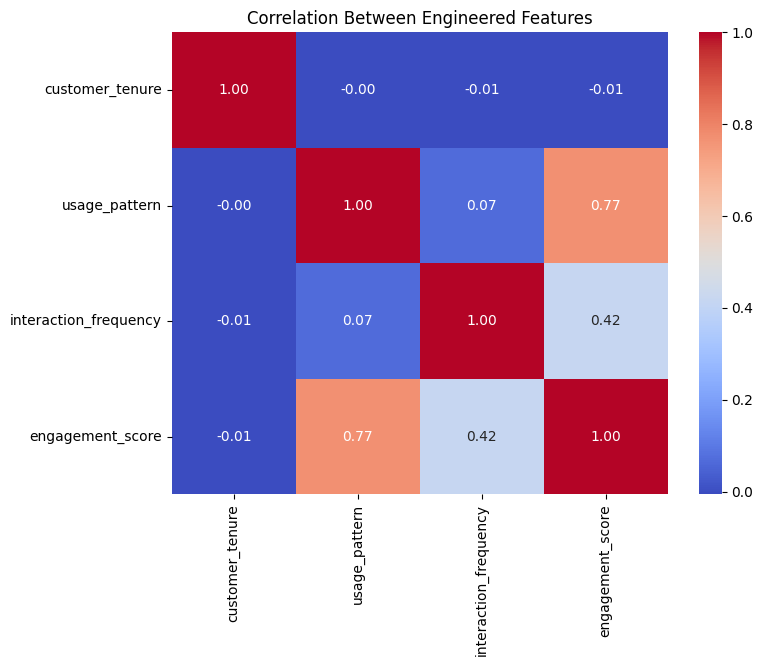

The correlation between customer_tenure and usage_pattern is -0.00, indicating a negative and weak relationship.
The correlation between customer_tenure and interaction_frequency is -0.01, indicating a negative and weak relationship.
The correlation between customer_tenure and engagement_score is -0.01, indicating a negative and weak relationship.
The correlation between usage_pattern and interaction_frequency is 0.07, indicating a positive and weak relationship.
The correlation between usage_pattern and engagement_score is 0.77, indicating a positive and strong relationship.
The correlation between interaction_frequency and engagement_score is 0.42, indicating a positive and moderate relationship.


In [5]:
# List of engineered features
eng_features = ['customer_tenure', 'usage_pattern', 'interaction_frequency', 'engagement_score']

# Compute the correlation matrix
eng_corr = engineered_data[eng_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(eng_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Engineered Features")
plt.show()

# Explanation of correlations
for i in range(len(eng_features)):
    for j in range(i+1, len(eng_features)):
        feature1 = eng_features[i]
        feature2 = eng_features[j]
        correlation = eng_corr.loc[feature1, feature2]

        # Interpret the correlation
        if abs(correlation) < 0.3:
            interpretation = "weak"
        elif abs(correlation) < 0.7:
            interpretation = "moderate"
        else:
            interpretation = "strong"

        direction = "positive" if correlation > 0 else "negative"

        print(f"The correlation between {feature1} and {feature2} is {correlation:.2f}, indicating a {direction} and {interpretation} relationship.")


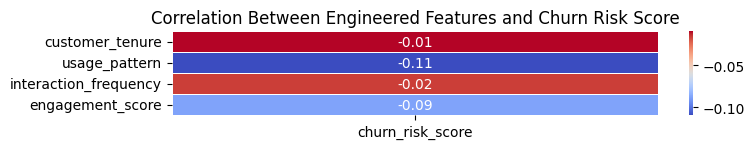

In [6]:
# Define your target
target = 'churn_risk_score'

# Make sure the column exists
if target not in engineered_data.columns:
    raise KeyError(f"'{target}' not found in the DataFrame")

# Select only engineered features + churn_risk_score
selected_cols = eng_features + [target]

# Compute correlation matrix
churn_corr = engineered_data[selected_cols].corr()

# Get only correlation with churn_risk_score
churn_relation = churn_corr[[target]].drop(index=target)

# Plot heatmap
plt.figure(figsize=(8, len(churn_relation) * 0.4))  # auto-adjust height
sns.heatmap(churn_relation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Engineered Features and Churn Risk Score")
plt.tight_layout()
plt.show()
